In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import sklearn
from sklearn import tree

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder

In [4]:
note = pd.read_json("data_4.txt")

In [6]:
note

,game,rank,gold,rerolls,units,player,move_freq,main_trait,level_one,level_two,level_three,rarity_one,rarity_two,rarity_three,rarity_four,rarity_five
1,VN1_3655815269,4,298,49,49,7863217,25,Set3_Celestial,1,7,0,2,2,1,2,1
2,VN1_3655805705,3,335,38,51,18250278,31,Battlecast,2,5,2,2,1,2,3,1
3,VN1_3655815278,3,235,59,45,14856370,50,Set3_Blademaster,0,5,2,3,1,1,2,0
4,VN1_3655815321,1,421,39,65,1812899,37,Sniper,1,9,0,1,1,1,4,3
5,VN1_3655806749,7,326,61,79,605012,43,DarkStar,3,4,2,2,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101996,VN1_3663238429,8,237,24,49,31084573,26,Set3_Brawler,1,8,0,2,2,2,2,1
101997,VN1_3663237119,2,398,35,80,60234352,16,Vanguard,1,8,1,3,3,1,1,2
101998,VN1_3663225418,3,347,73,59,58208651,27,Chrono,1,7,0,0,2,1,4,1
101999,VN1_3663226957,7,322,27,62,59616094,11,Set3_Mystic,1,5,1,0,1,3,3,0


In [4]:
note["rank"]

note["gold"]

note["rerolls"]

note["units"]

1         49
2         51
3         45
4         65
5         79
          ..
101996    49
101997    80
101998    59
101999    62
102000    79
Name: units, Length: 102000, dtype: int64

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

note[['gold', 'rerolls', 'units', 'move_freq']] = scaler.fit_transform(note[['gold', 'rerolls', 'units', 'move_freq']])

#X = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait_encoded']]

X = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait']]
# labelencoder = LabelEncoder()
# note['main_trait_encoded'] = labelencoder.fit_transform(note['main_trait'])


X = pd.get_dummies(X)

X = X.drop(columns=['main_trait_Vanguard'])

y = note[['rank']]

full_data

In [11]:
move_freq = pd.read_json("move_freq.txt", orient = "index")

move_freq

,game,player,move_freq,rank
1,VN1_3655815269,7863217,25,4
2,VN1_3655805705,18250278,31,3
3,VN1_3655815278,14856370,50,3
4,VN1_3655815321,1812899,37,1
5,VN1_3655806749,605012,43,7
...,...,...,...,...
101996,VN1_3663237119,60234352,26,2
101997,VN1_3663225418,58208651,16,3
101998,VN1_3663226957,59616094,27,7
101999,VN1_3663227039,39900321,11,5


/Users/vivian/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vivian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature: 0, Score: 0.52103
Feature: 1, Score: 0.12302
Feature: 2, Score: 0.11637
Feature: 3, Score: 0.11484
Feature: 4, Score: 0.00243
Feature: 5, Score: 0.00856
Feature: 6, Score: 0.00451
Feature: 7, Score: 0.00712
Feature: 8, Score: 0.00898
Feature: 9, Score: 0.00850
Feature: 10, Score: 0.00031
Feature: 11, Score: 0.00397
Feature: 12, Score: 0.00012
Feature: 13, Score: 0.00477
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00154
Feature: 16, Score: 0.00009
Feature: 17, Score: 0.00697
Feature: 18, Score: 0.00531
Feature: 19, Score: 0.01074
Feature: 20, Score: 0.00418
Feature: 21, Score: 0.00763
Feature: 22, Score: 0.00436
Feature: 23, Score: 0.00452
Feature: 24, Score: 0.00735
Feature: 25, Score: 0.01090
Feature: 26, Score: 0.01180
Feature: 27, Score: 0.00003


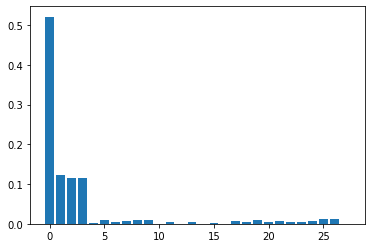

In [11]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_

print(importance[0])

#summarize feature importance
for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

In [ ]:
full_data = pd.read_json("data.txt", orient = "index")

full_data

In [ ]:
move_freq = pd.read_json("move_freq.txt", orient = "index")

move_freq

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jingj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature: 0, Score: 0.51888
Feature: 1, Score: 0.12424
Feature: 2, Score: 0.11577
Feature: 3, Score: 0.11497
Feature: 4, Score: 0.00246
Feature: 5, Score: 0.00874
Feature: 6, Score: 0.00442
Feature: 7, Score: 0.00716
Feature: 8, Score: 0.00924
Feature: 9, Score: 0.00848
Feature: 10, Score: 0.00032
Feature: 11, Score: 0.00376
Feature: 12, Score: 0.00010
Feature: 13, Score: 0.00486
Feature: 14, Score: 0.00006
Feature: 15, Score: 0.00146
Feature: 16, Score: 0.00008
Feature: 17, Score: 0.00702
Feature: 18, Score: 0.00554
Feature: 19, Score: 0.01099
Feature: 20, Score: 0.00417
Feature: 21, Score: 0.00793
Feature: 22, Score: 0.00424
Feature: 23, Score: 0.00468
Feature: 24, Score: 0.00757
Feature: 25, Score: 0.01091
Feature: 26, Score: 0.01194
Feature: 27, Score: 0.00004


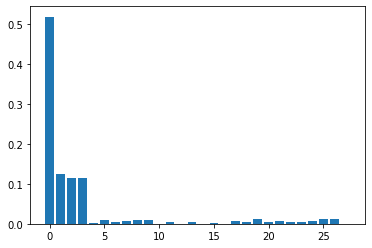

In [12]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.24448
Feature: 1, Score: 0.16229
Feature: 2, Score: 0.15929
Feature: 3, Score: 0.19993
Feature: 4, Score: 0.00380
Feature: 5, Score: 0.01644
Feature: 6, Score: 0.00797
Feature: 7, Score: 0.01246
Feature: 8, Score: 0.01770
Feature: 9, Score: 0.01652
Feature: 10, Score: 0.00038
Feature: 11, Score: 0.00631
Feature: 12, Score: 0.00017
Feature: 13, Score: 0.00753
Feature: 14, Score: 0.00016
Feature: 15, Score: 0.00267
Feature: 16, Score: 0.00014
Feature: 17, Score: 0.01311
Feature: 18, Score: 0.00995
Feature: 19, Score: 0.02050
Feature: 20, Score: 0.00686
Feature: 21, Score: 0.01486
Feature: 22, Score: 0.00622
Feature: 23, Score: 0.00884
Feature: 24, Score: 0.01384
Feature: 25, Score: 0.02342
Feature: 26, Score: 0.02410
Feature: 27, Score: 0.00006


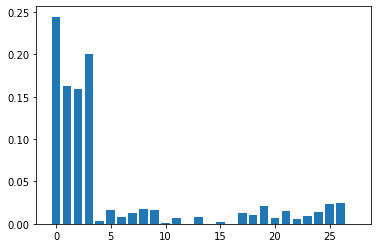

In [16]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
tree.plot_tree(model);